## 讀取資料

In [71]:
import pandas as pd

#讀取資料
dataset = pd.read_csv('LoanStats.csv')

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning:

Columns (0,19,47,123,124,125,128,129,130,133) have mixed types. Specify dtype option on import or set low_memory=False.



In [72]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423814 entries, 0 to 423813
Columns: 145 entries, id to settlement_term
dtypes: float64(108), object(37)
memory usage: 468.8+ MB


In [73]:
dataset.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

In [74]:
dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,12000.0,12000.0,12000.0,36 months,7.62%,373.94,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,27050.0,27050.0,27050.0,36 months,10.99%,885.46,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,12000.0,12000.0,12000.0,36 months,11.99%,398.52,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,28000.0,28000.0,28000.0,36 months,7.62%,872.52,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,12000.0,12000.0,12000.0,36 months,10.99%,392.81,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## 計算遺失值比例

In [75]:
(dataset.isna().sum() / len(dataset)).sort_values(ascending=False)

total_cu_tl                            1.000000
sec_app_mort_acc                       1.000000
sec_app_revol_util                     1.000000
sec_app_open_act_il                    1.000000
sec_app_num_rev_accts                  1.000000
sec_app_chargeoff_within_12_mths       1.000000
sec_app_collections_12_mths_ex_med     1.000000
sec_app_mths_since_last_major_derog    1.000000
sec_app_inq_last_6mths                 1.000000
sec_app_earliest_cr_line               1.000000
revol_bal_joint                        1.000000
inq_last_12m                           1.000000
inq_fi                                 1.000000
all_util                               1.000000
max_bal_bc                             1.000000
open_rv_24m                            1.000000
open_rv_12m                            1.000000
il_util                                1.000000
total_bal_il                           1.000000
mths_since_rcnt_il                     1.000000
open_il_24m                            1

In [76]:
((dataset.isna().sum() / len(dataset)) > 0.3).head()

id                  True
member_id           True
loan_amnt          False
funded_amnt        False
funded_amnt_inv    False
dtype: bool

In [77]:
import numpy as np
s = (dataset.isna().sum() / len(dataset)) > 0.3

s.where(s > 0.3)

id                                            1.0
member_id                                     1.0
loan_amnt                                     NaN
funded_amnt                                   NaN
funded_amnt_inv                               NaN
term                                          NaN
int_rate                                      NaN
installment                                   NaN
grade                                         NaN
sub_grade                                     NaN
emp_title                                     NaN
emp_length                                    NaN
home_ownership                                NaN
annual_inc                                    NaN
verification_status                           NaN
issue_d                                       NaN
loan_status                                   NaN
pymnt_plan                                    NaN
url                                           1.0
desc                                          1.0


## 刪除遺失值比例過高的欄位

In [78]:
dataset = dataset.iloc[:,2:111]         
empty_cols = [i for i in range(45,72)]   
dataset = dataset.drop(dataset.columns[empty_cols],axis=1)
#dataset.info()

In [79]:
dataset['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Late (31-120 days)', 'Current',
       'In Grace Period', nan, 'Late (16-30 days)', 'Default'],
      dtype=object)

## 目標編碼轉換

In [80]:
data_with_loanstatus_sliced = dataset[(dataset['loan_status']=="Fully Paid") | (dataset['loan_status']=="Charged Off")]

In [81]:
#data_with_loanstatus_sliced.info()

In [82]:
dataset['loan_status'].head()

0    Fully Paid
1    Fully Paid
2    Fully Paid
3    Fully Paid
4    Fully Paid
Name: loan_status, dtype: object

In [83]:
di = {"Fully Paid":0, "Charged Off":1}   
Dataset_withBoolTarget = data_with_loanstatus_sliced.replace({"loan_status": di})


In [84]:
Dataset_withBoolTarget['loan_status'].head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

## 探索遺失值

In [85]:
stats = Dataset_withBoolTarget.isnull().sum(axis = 1)

Populating the interactive namespace from numpy and matplotlib


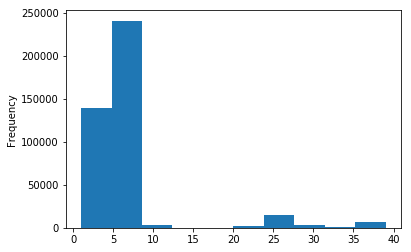

In [86]:
%pylab inline
stats.plot(kind = 'hist')

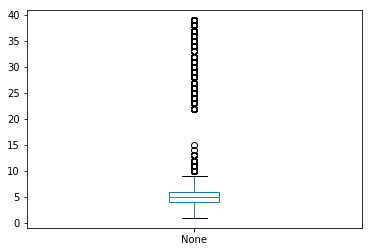

In [87]:
stats.plot(kind = 'box')

In [88]:
stats2 = Dataset_withBoolTarget.isnull().sum(axis = 0)

Populating the interactive namespace from numpy and matplotlib


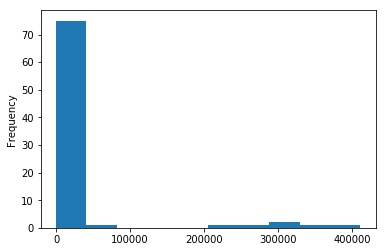

In [89]:
%pylab inline
stats2.plot(kind = 'hist')

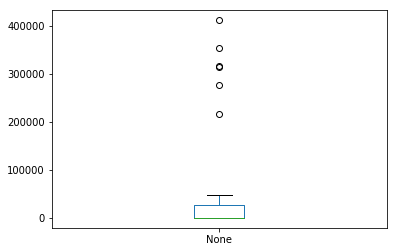

In [90]:
stats2.plot(kind = 'box')

In [91]:
Dataset_withBoolTarget.shape

(411273, 82)

## 刪除遺失值超過 340000 的欄位

In [92]:
dataset=Dataset_withBoolTarget.dropna(thresh = 340000,axis=1) 
print("Current shape of dataset :",dataset.shape)

Current shape of dataset : (411273, 76)


In [93]:
stats2 = dataset.isnull().sum(axis = 0)

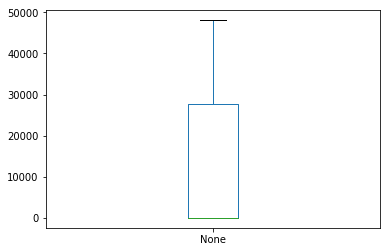

In [94]:
stats2.plot(kind = 'box')

## 移除遺失值過高的欄位

In [95]:
#移除欄位
del_col_names = ["delinq_2yrs",  "last_pymnt_d", "chargeoff_within_12_mths","delinq_amnt","emp_title", "term", "emp_title", "pymnt_plan","purpose","title", "zip_code", "verification_status", "dti","earliest_cr_line", "initial_list_status", "out_prncp",
"pymnt_plan", "num_tl_90g_dpd_24m", "num_tl_30dpd", "num_tl_120dpd_2m", "num_accts_ever_120_pd", "delinq_amnt", 
"chargeoff_within_12_mths", "total_rec_late_fee", "out_prncp_inv", "issue_d"] 
dataset = dataset.drop(labels = del_col_names, axis = 1) 
print("Current shape of dataset :",dataset.shape)

Current shape of dataset : (411273, 54)


In [100]:
(dataset.isna().sum() / len(dataset)).sort_values(ascending= False).head()

mths_since_recent_inq    0.116837
mo_sin_old_il_acct       0.099136
pct_tl_nvr_dlq           0.067824
avg_cur_bal              0.067481
mo_sin_old_rev_tl_op     0.067454
dtype: float64

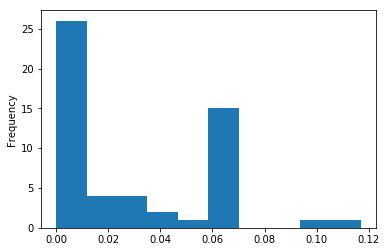

In [101]:
(dataset.isna().sum() / len(dataset)).plot(kind= 'hist')

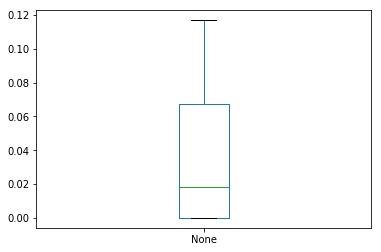

In [102]:
(dataset.isna().sum() / len(dataset)).plot(kind= 'box')

## Plotly
- pip install plotly

In [48]:
!  pip install plotly

  Found existing installation: decorator 3.4.0
    Uninstalling decorator-3.4.0:
      Successfully uninstalled decorator-3.4.0
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [51]:
import plotly.offline as pyo
import plotly.graph_objs as go
import numpy as np
pyo.init_notebook_mode(connected=True)

In [52]:
np.random.seed(42)
np.random.randint(1,42,6)

array([39, 29, 15,  8, 21, 39])

In [53]:
np.random.seed(42)
random_x = np.random.randint(1,101,100)
random_y = np.random.randint(1,101,100)

In [54]:
data = [
    go.Scatter(
        x = random_x,
        y = random_y,
        mode = 'markers',
    )
]

In [55]:
pyo.iplot(data, filename='scatter1.html')

In [56]:
data = [
    go.Box(
        y=[0, 1, 1, 2, 3, 5, 8, 13, 21],
        boxpoints='all',
        jitter=0.3,
        pointpos=-1.8
    )
]
pyo.iplot(data, filename='box.html')

## 欄位篩選

In [103]:
features = ['funded_amnt','emp_length','annual_inc','home_ownership','grade',
            "last_pymnt_amnt", "mort_acc", "pub_rec", "int_rate", "open_acc","num_actv_rev_tl",
            "mo_sin_rcnt_rev_tl_op","mo_sin_old_rev_tl_op","bc_util","bc_open_to_buy",
            "avg_cur_bal","acc_open_past_24mths",'loan_status'] 

In [104]:
Final_data = dataset[features]

In [105]:
Final_data.shape

(411273, 18)

In [106]:
Final_data.head()

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
0,12000.0,3 years,96500.0,MORTGAGE,A,2927.22,1.0,0.0,7.62%,17.0,5.0,10.0,118.0,83.5,2441.0,11783.0,4.0,0
1,27050.0,10+ years,55000.0,OWN,B,6074.19,4.0,0.0,10.99%,14.0,4.0,16.0,326.0,53.9,16473.0,9570.0,3.0,0
2,12000.0,10+ years,130000.0,MORTGAGE,B,398.28,3.0,0.0,11.99%,9.0,5.0,4.0,193.0,93.0,3567.0,36362.0,4.0,0
3,28000.0,5 years,325000.0,MORTGAGE,A,23915.86,5.0,0.0,7.62%,15.0,5.0,5.0,229.0,67.1,13901.0,53306.0,6.0,0
4,12000.0,4 years,60000.0,RENT,B,3775.55,0.0,0.0,10.99%,15.0,7.0,1.0,48.0,15.9,15216.0,476.0,8.0,0


In [107]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411273 entries, 0 to 423811
Data columns (total 18 columns):
funded_amnt              411273 non-null float64
emp_length               391832 non-null object
annual_inc               411273 non-null float64
home_ownership           411273 non-null object
grade                    411273 non-null object
last_pymnt_amnt          411273 non-null float64
mort_acc                 403778 non-null float64
pub_rec                  411273 non-null float64
int_rate                 411273 non-null object
open_acc                 411273 non-null float64
num_actv_rev_tl          383532 non-null float64
mo_sin_rcnt_rev_tl_op    383531 non-null float64
mo_sin_old_rev_tl_op     383531 non-null float64
bc_util                  399679 non-null float64
bc_open_to_buy           399920 non-null float64
avg_cur_bal              383520 non-null float64
acc_open_past_24mths     403778 non-null float64
loan_status              411273 non-null int64
dtypes: float

In [108]:
?Final_data.select_dtypes

In [110]:
Final_data.select_dtypes(include='object').head()

,emp_length,home_ownership,grade,int_rate
0,3 years,MORTGAGE,A,7.62%
1,10+ years,OWN,B,10.99%
2,10+ years,MORTGAGE,B,11.99%
3,5 years,MORTGAGE,A,7.62%
4,4 years,RENT,B,10.99%


In [114]:
Final_data['int_rate'] = Final_data['int_rate'].map(lambda e: float(e.replace('%', '')) )

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [116]:
Final_data= Final_data.reset_index(drop=True)
print("Current shape of dataset :",Final_data.shape)

Current shape of dataset : (411273, 18)


In [115]:
Final_data.select_dtypes(include='object').head()

,emp_length,home_ownership,grade
0,3 years,MORTGAGE,A
1,10+ years,OWN,B
2,10+ years,MORTGAGE,B
3,5 years,MORTGAGE,A
4,4 years,RENT,B


In [117]:
Final_data['grade'].unique()

array(['A', 'B', 'D', 'C', 'E', 'F', 'G'], dtype=object)

In [118]:
Final_data['grade'] = Final_data['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})

In [119]:
Final_data.select_dtypes(include='object').head()

,emp_length,home_ownership
0,3 years,MORTGAGE
1,10+ years,OWN
2,10+ years,MORTGAGE
3,5 years,MORTGAGE
4,4 years,RENT


In [121]:
Final_data['home_ownership'].unique()

array(['MORTGAGE', 'OWN', 'RENT', 'NONE', 'OTHER', 'ANY'], dtype=object)

In [122]:
Final_data["home_ownership"] = Final_data["home_ownership"].map({"MORTGAGE":6,"RENT":5,"OWN":4,"OTHER":3,"NONE":2,"ANY":1})

In [123]:
Final_data.select_dtypes(include='object').head()

,emp_length
0,3 years
1,10+ years
2,10+ years
3,5 years
4,4 years


In [124]:
Final_data['emp_length'].unique()

array(['3 years', '10+ years', '5 years', '4 years', '6 years', '1 year',
       '2 years', '7 years', '9 years', '8 years', '< 1 year', nan],
      dtype=object)

In [129]:
Final_data["emp_length"] = Final_data["emp_length"].fillna('0')

In [131]:
import re
Final_data["emp_length"] = Final_data["emp_length"].map(lambda e: int(re.search('(\d+)', e).group(0)) )

In [132]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411273 entries, 0 to 411272
Data columns (total 18 columns):
funded_amnt              411273 non-null float64
emp_length               411273 non-null int64
annual_inc               411273 non-null float64
home_ownership           411273 non-null int64
grade                    411273 non-null int64
last_pymnt_amnt          411273 non-null float64
mort_acc                 403778 non-null float64
pub_rec                  411273 non-null float64
int_rate                 411273 non-null float64
open_acc                 411273 non-null float64
num_actv_rev_tl          383532 non-null float64
mo_sin_rcnt_rev_tl_op    383531 non-null float64
mo_sin_old_rev_tl_op     383531 non-null float64
bc_util                  399679 non-null float64
bc_open_to_buy           399920 non-null float64
avg_cur_bal              383520 non-null float64
acc_open_past_24mths     403778 non-null float64
loan_status              411273 non-null int64
dtypes: float64

## 以平均數填補遺失值

In [134]:
s = Final_data.isna().sum() 
s[s>0]

mort_acc                  7495
num_actv_rev_tl          27741
mo_sin_rcnt_rev_tl_op    27742
mo_sin_old_rev_tl_op     27742
bc_util                  11594
bc_open_to_buy           11353
avg_cur_bal              27753
acc_open_past_24mths      7495
dtype: int64

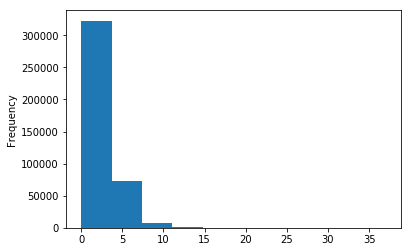

In [137]:
Final_data['mort_acc'].plot(kind = 'hist')

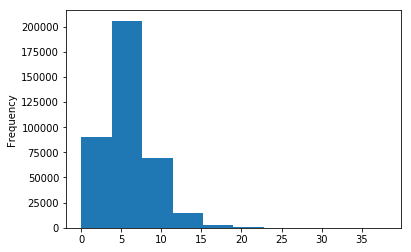

In [139]:
Final_data['num_actv_rev_tl'].plot(kind = 'hist')

In [140]:
Final_data.fillna(Final_data.mean(),inplace = True)
print("Current shape of dataset :",Final_data.shape)

Current shape of dataset : (411273, 18)


In [142]:
s = Final_data.isna().sum() 
s

funded_amnt              0
emp_length               0
annual_inc               0
home_ownership           0
grade                    0
last_pymnt_amnt          0
mort_acc                 0
pub_rec                  0
int_rate                 0
open_acc                 0
num_actv_rev_tl          0
mo_sin_rcnt_rev_tl_op    0
mo_sin_old_rev_tl_op     0
bc_util                  0
bc_open_to_buy           0
avg_cur_bal              0
acc_open_past_24mths     0
loan_status              0
dtype: int64

In [143]:
Final_data.head()

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
0,12000.0,3,96500.0,6,7,2927.22,1.0,0.0,7.62,17.0,5.0,10.0,118.0,83.5,2441.0,11783.0,4.0,0
1,27050.0,10,55000.0,4,6,6074.19,4.0,0.0,10.99,14.0,4.0,16.0,326.0,53.9,16473.0,9570.0,3.0,0
2,12000.0,10,130000.0,6,6,398.28,3.0,0.0,11.99,9.0,5.0,4.0,193.0,93.0,3567.0,36362.0,4.0,0
3,28000.0,5,325000.0,6,7,23915.86,5.0,0.0,7.62,15.0,5.0,5.0,229.0,67.1,13901.0,53306.0,6.0,0
4,12000.0,4,60000.0,5,6,3775.55,0.0,0.0,10.99,15.0,7.0,1.0,48.0,15.9,15216.0,476.0,8.0,0


## 資料標準化

In [144]:
from sklearn import preprocessing,metrics 
scl = preprocessing.StandardScaler() 


In [145]:
?preprocessing.StandardScaler

In [146]:
Final_data.columns

Index(['funded_amnt', 'emp_length', 'annual_inc', 'home_ownership', 'grade',
       'last_pymnt_amnt', 'mort_acc', 'pub_rec', 'int_rate', 'open_acc',
       'num_actv_rev_tl', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_old_rev_tl_op',
       'bc_util', 'bc_open_to_buy', 'avg_cur_bal', 'acc_open_past_24mths',
       'loan_status'],
      dtype='object')

In [147]:
fields = Final_data.columns.values[:-1]
fields

array(['funded_amnt', 'emp_length', 'annual_inc', 'home_ownership',
       'grade', 'last_pymnt_amnt', 'mort_acc', 'pub_rec', 'int_rate',
       'open_acc', 'num_actv_rev_tl', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_old_rev_tl_op', 'bc_util', 'bc_open_to_buy', 'avg_cur_bal',
       'acc_open_past_24mths'], dtype=object)

In [148]:
data_clean = pd.DataFrame(scl.fit_transform(Final_data[fields]), columns = fields)
data_clean.head()

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths
0,-0.299476,-0.787331,0.429087,0.890293,1.387048,-0.252133,-0.383997,-0.323443,-1.439964,1.134412,-0.248869,-0.220361,-0.730107,0.694300,-0.452627,-0.110954,-0.075437
1,1.520061,1.130234,-0.344829,-2.171730,0.620423,0.263337,1.006702,-0.323443,-0.672232,0.532558,-0.589591,0.167135,1.637470,-0.444565,0.617771,-0.252862,-0.437197
2,-0.299476,1.130234,1.053815,0.890293,0.620423,-0.666370,0.543136,-0.323443,-0.444419,-0.470533,-0.248869,-0.607858,0.123587,1.059815,-0.366732,1.465171,-0.075437
3,1.634916,-0.239455,4.690290,0.890293,1.387048,3.185782,1.470269,-0.323443,-1.439964,0.733176,-0.248869,-0.543275,0.533360,0.063307,0.421572,2.551702,0.648083
4,-0.299476,-0.513393,-0.251586,-0.640718,0.620423,-0.113177,-0.847563,-0.323443,-0.672232,0.733176,0.432574,-0.801606,-1.526888,-1.906622,0.521884,-0.836013,1.371604


In [149]:
data_clean['loan_status'] = Final_data['loan_status']


In [150]:
data_clean.head()

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
0,-0.299476,-0.787331,0.429087,0.890293,1.387048,-0.252133,-0.383997,-0.323443,-1.439964,1.134412,-0.248869,-0.220361,-0.730107,0.694300,-0.452627,-0.110954,-0.075437,0
1,1.520061,1.130234,-0.344829,-2.171730,0.620423,0.263337,1.006702,-0.323443,-0.672232,0.532558,-0.589591,0.167135,1.637470,-0.444565,0.617771,-0.252862,-0.437197,0
2,-0.299476,1.130234,1.053815,0.890293,0.620423,-0.666370,0.543136,-0.323443,-0.444419,-0.470533,-0.248869,-0.607858,0.123587,1.059815,-0.366732,1.465171,-0.075437,0
3,1.634916,-0.239455,4.690290,0.890293,1.387048,3.185782,1.470269,-0.323443,-1.439964,0.733176,-0.248869,-0.543275,0.533360,0.063307,0.421572,2.551702,0.648083,0
4,-0.299476,-0.513393,-0.251586,-0.640718,0.620423,-0.113177,-0.847563,-0.323443,-0.672232,0.733176,0.432574,-0.801606,-1.526888,-1.906622,0.521884,-0.836013,1.371604,0


## Bootstrap Sampling

In [151]:
data_clean['loan_status'].value_counts()

0    340444
1     70829
Name: loan_status, dtype: int64

In [153]:
loanstatus_0 = data_clean[data_clean["loan_status"]==0]
loanstatus_1 = data_clean[data_clean["loan_status"]==1]


In [154]:
subset_of_loanstatus_0 = loanstatus_0.sample(n=5500)
subset_of_loanstatus_1 = loanstatus_1.sample(n=5500)

In [155]:
data_clean = pd.concat([subset_of_loanstatus_1, subset_of_loanstatus_0])

In [156]:
data_clean.shape

(11000, 18)

In [159]:
data_clean.index

Int64Index([201953, 403851, 320126,  36777, 189305, 293153, 210823, 192103,
            386699, 369362,
            ...
            349410, 361422, 214463, 306378, 321894, 108284, 248347, 361642,
            396023, 302106],
           dtype='int64', length=11000)

## Reshuffle

In [160]:
data_clean = data_clean.sample(frac=1).reset_index(drop=True)

In [161]:
data_clean.index

RangeIndex(start=0, stop=11000, step=1)

In [162]:
print("Current shape of dataset :",data_clean.shape)
data_clean.head()


Current shape of dataset : (11000, 18)


,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
0,-1.417797,1.130234,-0.344829,0.890293,-0.146201,-0.439487,0.079569,-0.323443,0.423550,-0.269915,-0.248869,0.037970,-0.934993,1.086747,-0.635018,0.407560,0.286323,0
1,-0.783074,1.130234,-0.702882,-0.640718,0.620423,-0.687461,-0.847563,1.568027,-0.216606,-0.470533,-0.589591,-0.543275,0.886220,0.244141,-0.385269,-0.753741,-0.798958,1
2,1.151318,0.582358,-0.065100,-0.640718,-0.146201,-0.542035,-0.847563,-0.323443,0.125114,-0.069297,0.773295,-0.349527,-1.640714,1.217563,-0.628305,-0.508592,1.371604,1
3,0.861159,-1.061269,-0.475369,-0.640718,-2.446075,-0.630583,-0.847563,-0.323443,2.207329,-0.671151,-0.589591,-0.866189,-0.513838,-1.002455,0.323244,-0.711290,0.286323,1
4,-0.743782,-0.787331,-0.922936,-0.640718,-0.146201,-0.684129,-0.847563,-0.323443,0.311921,0.331940,0.091852,-0.672440,-0.434160,1.105985,-0.628687,-0.809017,-0.437197,1


In [163]:
data_clean['loan_status'].value_counts()

1    5500
0    5500
Name: loan_status, dtype: int64

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_clean.iloc[:,:-1], data_clean.iloc[:,-1], test_size=0.2, random_state=42)

In [172]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8800, 17), (2200, 17), (8800,), (2200,))

## RFE (特徵篩選)

In [173]:
from sklearn import linear_model,svm
from sklearn.feature_selection import RFE
# create the RFE model and select 3 attributes
clf_LR = linear_model.LogisticRegression(C=1e30)
clf_LR.fit(X_train,y_train)

LogisticRegression(C=1e+30, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [167]:
?RFE

In [175]:
rfe = RFE(clf_LR, 10)
rfe = rfe.fit(data_clean.iloc[:,:-1].values,
              data_clean.iloc[:,-1].values)

In [176]:
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True False  True False  True  True  True False  True False False False
  True False  True  True  True]
[1 4 1 6 1 1 1 3 1 8 5 7 1 2 1 1 1]


## RFECV  (特徵篩選)

In [177]:
from sklearn.feature_selection import RFECV
rfe2 = RFECV(clf_LR)
rfe2 = rfe2.fit(data_clean.iloc[:,:-1].values,
              data_clean.iloc[:,-1].values)

In [179]:
rfe2.support_

array([ True, False,  True, False,  True,  True, False, False,  True,
       False, False, False, False, False, False, False,  True])

In [180]:
rfe2.ranking_

array([ 1,  8,  1, 10,  1,  1,  4,  7,  1, 12,  9, 11,  5,  6,  3,  2,  1])

## PCA (特徵萃取)

In [186]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=10, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print('Expected Variance is '+ str(explained_variance))


Expected Variance is [0.16262568 0.15404344 0.12686196 0.07309442 0.07115038 0.06516573
 0.05717912 0.04884113 0.04435844 0.03985688]


<BarContainer object of 10 artists>

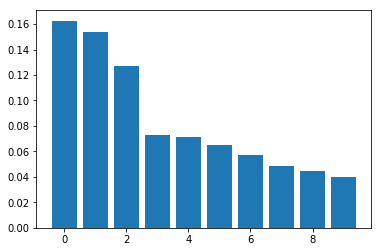

In [191]:
plt.bar(x= range(10), height=pca.explained_variance_ratio_)

## 資料篩選

In [192]:
X_train.columns[rfe.support_]

Index(['funded_amnt', 'annual_inc', 'grade', 'last_pymnt_amnt', 'mort_acc',
       'int_rate', 'mo_sin_old_rev_tl_op', 'bc_open_to_buy', 'avg_cur_bal',
       'acc_open_past_24mths'],
      dtype='object')

In [185]:
X_train[X_train.columns[rfe.support_]].head()

,funded_amnt,annual_inc,grade,last_pymnt_amnt,mort_acc,int_rate,mo_sin_old_rev_tl_op,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths
10735,0.425921,0.345169,-1.679450,-0.652814,-0.847563,1.494273,0.000000,-0.507169,1.166424e-16,-0.075437
5937,-0.783074,-0.717801,-0.912826,-0.634980,-0.847563,0.824501,-1.174028,-0.589783,-7.454047e-01,-1.160718
7642,-1.266672,-0.624558,-0.146201,-0.708699,-0.847563,0.380265,-1.845600,-0.457203,-7.457895e-01,0.648083
3328,-0.299476,-0.065100,-0.146201,-0.686894,0.079569,-0.216606,1.432584,0.896889,-7.985642e-01,0.286323
8681,0.667720,0.214628,-0.146201,-0.620674,-0.383997,-0.134593,-0.092682,-0.620143,5.611387e-01,0.286323


In [193]:
X_train = X_train[X_train.columns[rfe.support_]]

In [194]:
X_test = X_test[X_test.columns[rfe.support_]]

In [195]:
X_train.shape, X_test.shape

((8800, 10), (2200, 10))

In [199]:
data_clean = data_clean[['funded_amnt', 'annual_inc', 'grade', 'last_pymnt_amnt', 'mort_acc',
       'int_rate', 'mo_sin_old_rev_tl_op', 'bc_open_to_buy', 'avg_cur_bal',
       'acc_open_past_24mths', 'loan_status']]

In [200]:
data_clean.shape

(11000, 11)

## Grid Search

In [201]:
from sklearn.model_selection import GridSearchCV

def cross_validation_best_parameters(model, param_grid):
    grid = GridSearchCV(model, param_grid,cv=10, scoring='accuracy')
    X=data_clean.iloc[:,:-1].values
    y=data_clean.iloc[:,-1].values
    grid.fit(X,y)
    mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    return mean_scores,grid.best_score_,grid.best_estimator_


In [202]:
logreg = linear_model.LogisticRegression(random_state=0)
c=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(C=c)
mean_scores,Best_Accuracy, Best_classifier = cross_validation_best_parameters(logreg,param_grid)
print("Best accuracy is "+ str(Best_Accuracy))
print(Best_classifier)



Best accuracy is 0.8252727272727273
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning:

The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20



In [203]:
mean_scores

[0.7724545454545455,
 0.8029090909090909,
 0.8169090909090909,
 0.8237272727272728,
 0.8251818181818181,
 0.8252727272727273,
 0.8252727272727273]

In [204]:
Best_classifier

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [205]:
Best_classifier.C

100

In [206]:
clf_LR = linear_model.LogisticRegression(C=Best_classifier.C)
clf_LR.fit(X_train,y_train)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [210]:
from sklearn.metrics import accuracy_score
LR_Predict = clf_LR.predict_proba(X_test)[:,1]
LR_Accuracy = accuracy_score(y_test,LR_Predict.round())
LR_Accuracy

0.8322727272727273

In [211]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, LR_Predict.round())

array([[ 808,  289],
       [  80, 1023]])

In [212]:
LR_Predict

array([9.42308336e-01, 4.79744016e-01, 7.91902481e-01, ...,
       8.10901891e-01, 6.93378514e-01, 4.70539699e-05])

In [213]:
LR_Predict.round()

array([1., 0., 1., ..., 1., 1., 0.])

## ROC Curve

In [214]:
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Ricty',rc={"lines.linewidth": 2, 'grid.linestyle': '--'})

def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning:

findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning:

findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning:

findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning:

findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning:

findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/mat

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning:

findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning:

findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning:

findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning:

findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning:

findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/mat

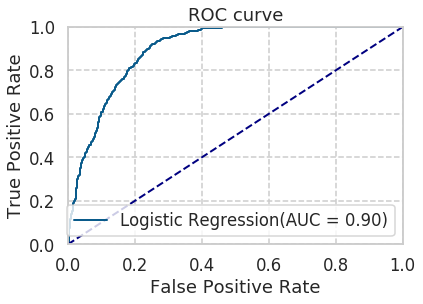

In [215]:
plotAUC(y_test,LR_Predict,'Logistic Regression')
plt.show()

